In [ ]:
# Importing necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
maths_df = pd.read_csv('/content/student-mat.csv', sep=';')
maths_df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Preprocessing


In [ ]:
maths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## Converting object to int

As we are going to be using the RandomForestClassifier as our model, we need to have the data in form of integer or float values.


In [ ]:
# binary_mapping = {'yes': 1, 'no': 0}
# binary_columns = ['schoolsup', 'famsup', 'paid',
#                   'activities', 'nursery', 'higher', 'internet', 'romantic']
# for col in binary_columns:
#     maths_df[col] = maths_df[col].map(binary_mapping)

In [ ]:
# One-hot encoding

maths_df = pd.get_dummies(maths_df, columns=['Mjob', 'Fjob', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'guardian', 'reason', 'schoolsup', 'famsup', 'paid',
                  'activities', 'nursery', 'higher', 'internet', 'romantic'])

In [ ]:
maths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   Medu               395 non-null    int64
 2   Fedu               395 non-null    int64
 3   traveltime         395 non-null    int64
 4   studytime          395 non-null    int64
 5   failures           395 non-null    int64
 6   famrel             395 non-null    int64
 7   freetime           395 non-null    int64
 8   goout              395 non-null    int64
 9   Dalc               395 non-null    int64
 10  Walc               395 non-null    int64
 11  health             395 non-null    int64
 12  absences           395 non-null    int64
 13  G1                 395 non-null    int64
 14  G2                 395 non-null    int64
 15  G3                 395 non-null    int64
 16  Mjob_at_home       395 non-null    uint8
 17  Mjob_health     

# Model Building


In [ ]:
# Seperating dependent and independent variables
X = maths_df[['G2', 'absences', 'schoolsup_yes', 'schoolsup_no', 'traveltime',
       'famrel', 'guardian_mother', 'freetime', 'age', 'G1', 'reason_course',
       'Fjob_services', 'famsize_GT3', 'nursery_yes', 'nursery_no',
       'reason_home', 'famsize_LE3', 'Mjob_other', 'internet_yes',
       'internet_no', 'address_R', 'Mjob_at_home', 'Mjob_teacher', 'address_U',
       'guardian_father', 'sex_M', 'famsup_no', 'Mjob_services']]
y = maths_df['G3']


In [ ]:
# Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [ ]:
# Splitting the dataset into training and testing set.
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
for train_index, test_index in kf.split(scaled_X, y):
    X_train, X_test = scaled_X[train_index], scaled_X[test_index]
    y_train, y_test = y[train_index], y[test_index]

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((356, 28), (39, 28), (356,), (39,))

In [ ]:
from sklearn.ensemble import RandomForestRegressor as RFR

clf = RFR(random_state=101)
clf.fit(X_train, y_train)

RandomForestRegressor(random_state=161)

In [ ]:
from sklearn.metrics import mean_squared_error as rmse

y_pred = clf.predict(X_test)
print('RMSE:',rmse(y_test, y_pred))

RMSE: 1.7910153846153842


## Feature Importance


In [ ]:
feature_imp = pd.Series(clf.feature_importances_,
                        index=X.columns).sort_values(ascending=False)
feature_imp.index[:33]
feature_imp

G2                 0.766685
absences           0.120455
age                0.024473
famrel             0.015645
G1                 0.011845
reason_home        0.007618
freetime           0.007250
guardian_mother    0.005459
Fjob_services      0.004585
schoolsup_no       0.004231
traveltime         0.003856
Mjob_at_home       0.003333
reason_course      0.003068
sex_M              0.002643
Mjob_teacher       0.002355
Mjob_other         0.002010
famsup_no          0.001969
nursery_no         0.001889
internet_no        0.001596
Mjob_services      0.001462
internet_yes       0.001372
schoolsup_yes      0.001307
guardian_father    0.001306
nursery_yes        0.001251
famsize_GT3        0.001018
famsize_LE3        0.000578
address_U          0.000413
address_R          0.000329
dtype: float64

No handles with labels found to put in legend.


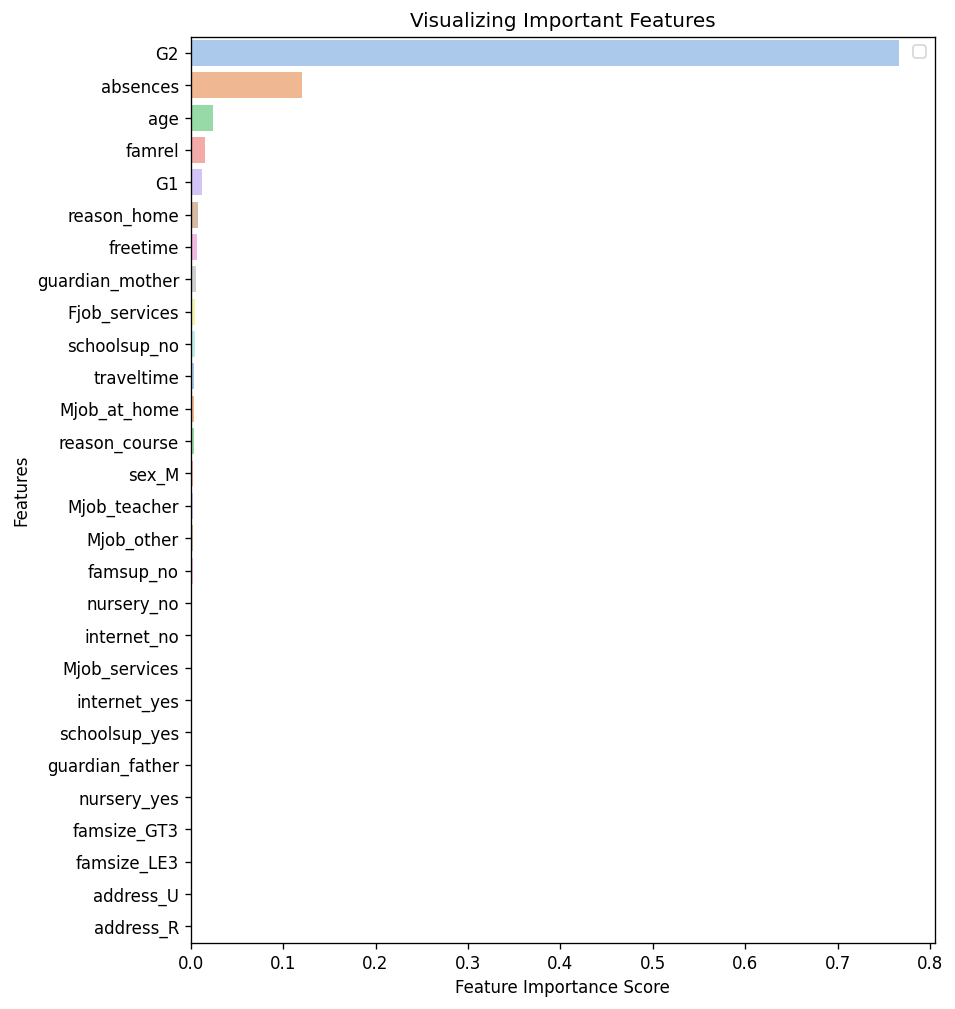

In [ ]:
# Creating a bar plot
plt.figure(figsize=(8, 10), dpi=120)
pal = sns.color_palette("Greens_d", len(feature_imp), )
rank = feature_imp.argsort().argsort()
sns.barplot(x=feature_imp, y=feature_imp.index, palette="pastel")
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


## Hyperparameter Tuning


By using two helper functions `calc_score` and `effect` we will analyse the effect of changing the parameters of the model.

In [ ]:
def calc_score(model, x1, y1, x2, y2):
    '''
    model: ML Model to use,
    x1 = X_train,
    y1 = y_train,
    x2 = X_test,
    y2 = y_test

    returns : Root Mean Square Value on train data and test data
    '''
    model.fit(x1, y1)
    predict = model.predict(x1)
    rmse1 = rmse(y1, predict)

    predict = model.predict(x2)
    rmse2 = rmse(y2, predict)

    return rmse1, rmse2


In [ ]:
def effect(train_score, test_score, x_axis, title):
    '''
    train_score : array of train scores,
    test_score : array of test scores,
    x_axis : data to be plotted at the x-axis of the graph,
    title : title required for the graph

    returns : a plot of observed RMSE values over various train and test data 
    '''
    plt.figure(figsize=(5, 5), dpi=120)
    plt.plot(x_axis, train_score, color='red', label='train_score')
    plt.plot(x_axis, test_score, color='blue', label='test_score')
    plt.title(title)
    plt.legend()
    plt.xlabel("parameter value")
    plt.ylabel("RMSE score")
    plt.show()


In [ ]:
clf = RFR()
clf.fit(X_train, y_train)


RandomForestRegressor()

### max_depth


In [ ]:
max_depth = [i for i in range(1, 50)]
train = []
test = []

for i in max_depth:
    model = RFR(
        n_estimators=50,
        random_state=101,
        max_depth=i,
        n_jobs=-1
    )
    rmse1, rmse2 = calc_score(model, X_train, y_train, X_test, y_test)
    train.append(rmse1)
    test.append(rmse2)

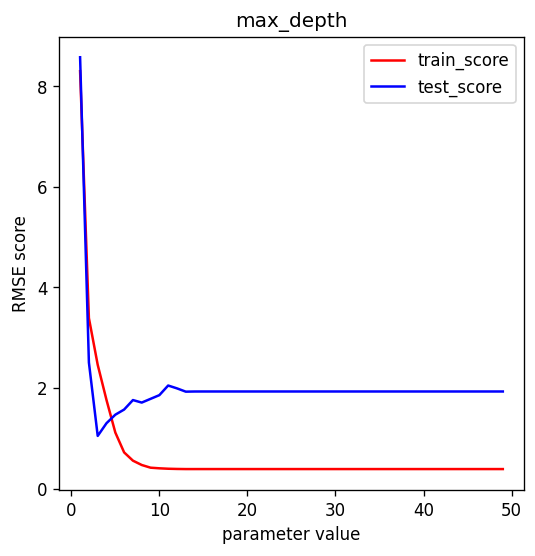

In [ ]:
effect(train, test, max_depth, 'max_depth')


### n_estimators


In [ ]:
estimators = [i for i in range(1, 600, 10)]
train = []
test = []

for i in estimators:
    model = RFR(
        n_estimators=i,
        max_depth=10,
        random_state=101,
        n_jobs=-1
    )
    rmse1, rmse2 = calc_score(model, X_train, y_train, X_test, y_test)
    train.append(rmse1)
    test.append(rmse2)


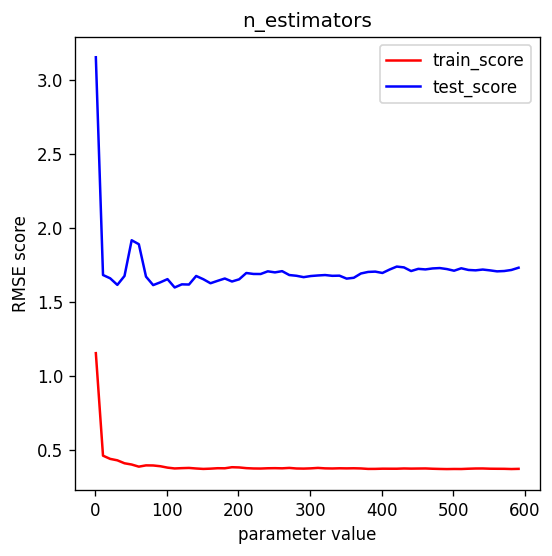

In [ ]:
effect(train, test, range(1, 600, 10), 'n_estimators')


# Conclusion

Updating the hyperparameters of the model for better results

In [ ]:
clf = RFR(n_estimators=10, max_depth=3, random_state=101, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(rmse(y_test, y_pred))

0.9877996677667912


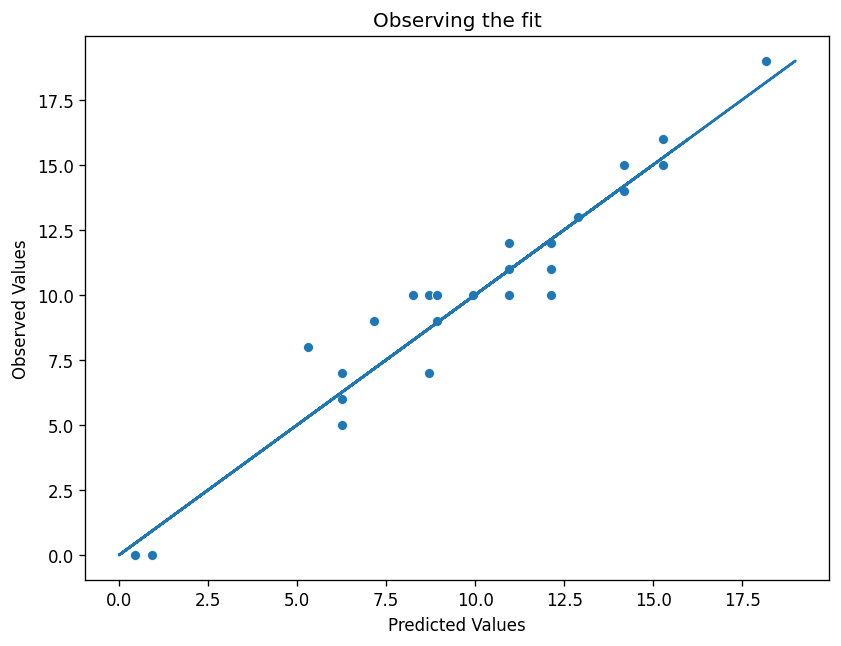

In [ ]:
# Creating a scatter plot
plot_data = pd.DataFrame({'predicted':y_pred, 'observed':y_test})
plt.figure(figsize=(8, 6), dpi=120)
sns.scatterplot(x = 'predicted', y = 'observed', data = plot_data)
plt.plot(y_test, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Observed Values')
plt.title("Observing the fit")
plt.show()